<a href="https://colab.research.google.com/github/AtabonfackBernes/AtabonfackBernes/blob/main/Basic_classification_with_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
print(tf.__version__)

2.15.0


## Importing the Fashion MNIST Data set

In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
len(test_images)

10000

## Data visualization and preprocessing

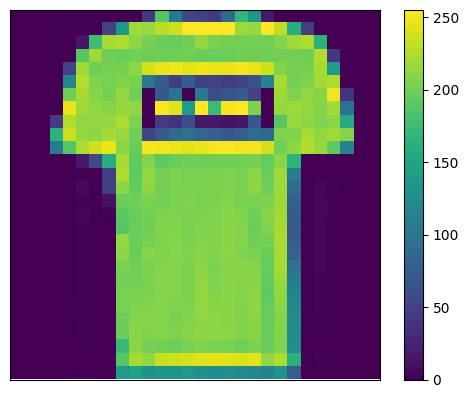

In [ ]:
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.ylabel('')
plt.yticks([])
plt.xticks([])
plt.xlabel("")
plt.show()

### Normalizing the images

In [ ]:
train_images = train_images/255.0
test_images = test_images/255.0

### Visualizing some images

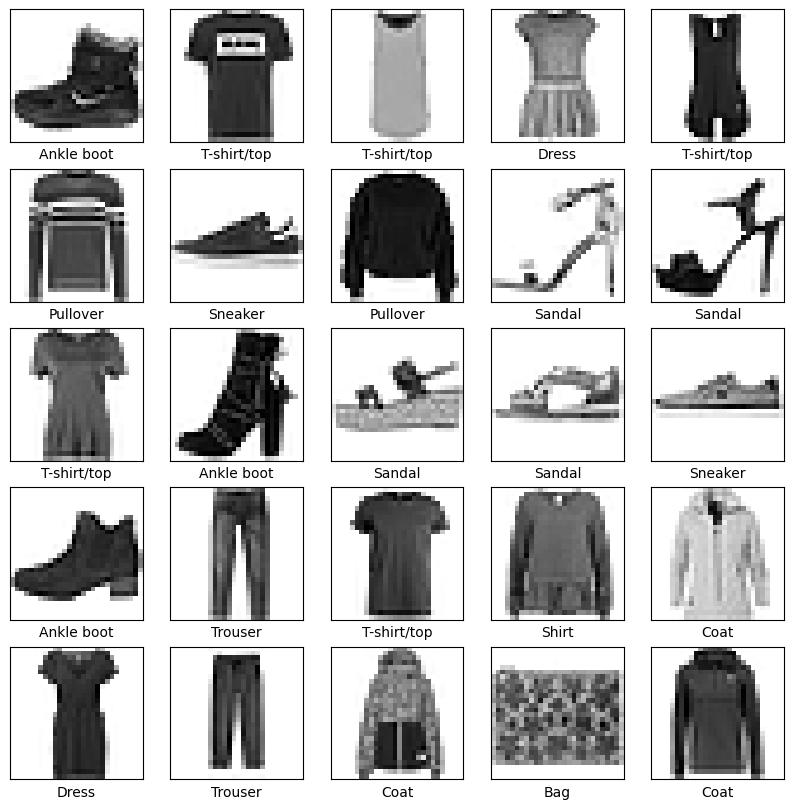

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.yticks([])
  plt.xticks([])
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(10)
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy']
              )

In [ ]:
model.fit(train_images, train_labels, epochs= 10)

Epoch 1/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.5028 - accuracy: 0.8250
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3760 - accuracy: 0.8638
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3408 - accuracy: 0.8763
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3150 - accuracy: 0.8840
Epoch 5/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.2965 - accuracy: 0.8907
Epoch 6/10
1875/1875 [==============================] - 20s 10ms/step - loss: 0.2822 - accuracy: 0.8965
Epoch 7/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2713 - accuracy: 0.8996
Epoch 8/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2607 - accuracy: 0.9032
Epoch 9/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2514 - accuracy: 0.9053
Epoch 10/10
1875/1875 [==============================] - 9s 5ms/step - los

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"Test Accuracy = {np.round(test_acc,2)}\nTest Loss = {np.round(test_loss,2)}")

313/313 - 1s - loss: 0.3400 - accuracy: 0.8800 - 1s/epoch - 4ms/step
Test Accuracy = 0.88
Test Loss = 0.34


## Attaching a Softmax Function to the model to get probabilities of predicted outputs

In [ ]:
probability_model = tf.keras.Sequential([
    model,
    tf.keras.layers.Softmax()
])

In [ ]:
predictions = probability_model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


In [ ]:
predictions[1]

array([5.3088177e-05, 1.1701615e-13, 9.9873823e-01, 2.7247630e-13,
       8.3923439e-04, 6.3360944e-14, 3.6941440e-04, 2.3421067e-16,
       7.2045386e-10, 8.8602238e-15], dtype=float32)

In [ ]:
print(np.where(predictions[1]==[np.max(predictions[1])]))

(array([2]),)


In [ ]:
class_names[(np.argmax(predictions[1]))]

'Pullover'

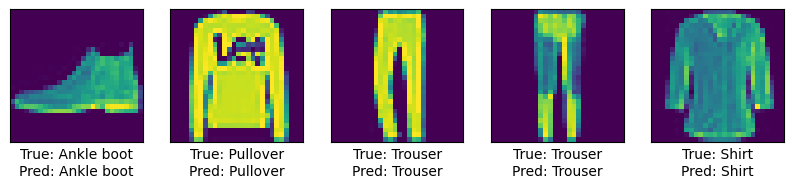

In [ ]:
plt.figure(figsize=(10,10))
for i in range(5):
  true_label = class_names[test_labels[i]]
  pred_label = class_names[np.argmax(predictions[i])]
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.ylabel('')
  plt.imshow(test_images[i])
  plt.xlabel(f'True: {true_label}\nPred: {pred_label}')


## Predicting a A Single Image

In [ ]:
single_test = test_images[35]
img = np.expand_dims(single_test,0)
img.shape

(1, 28, 28)

In [ ]:
single_pred = model.predict(img)

1/1 [==============================] - 0s 25ms/step


In [ ]:
print(class_names[np.argmax(single_pred)])

T-shirt/top
